<a href="https://colab.research.google.com/github/sanazgit/Deep-Iearning-Projects/blob/main/Single_layer_ANN_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single-layer ANN for multiclass classification**

In this project, I built a very simple neural network (**Single layer**) from scratch for a 32-class problem for the following modes:



1.   Least square
2.   Sigmoid
3.   Softmax






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from math import log
from numpy import mean
from scipy.io import loadmat 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

* **Import the data**

I load the data and see what it looks like:

In [ ]:
mat = loadmat('/content/drive/MyDrive/Colab Notebooks/Deep Learning/MultiClass-Problem-Train-Deep-1.mat')  # load mat-file
X_train = mat['All_Data']  # variable in mat file
y_train = mat['All_Labels']  # variable in mat file

In [ ]:
X_train.shape

(1600, 5)

In [ ]:
mat_test = loadmat('/content/drive/MyDrive/Colab Notebooks/Deep Learning/MultiClass-Problem-Test-Deep-1.mat')  # load mat-file
X_test = mat_test['All_Data']  # variable in mat file
y_test = mat_test['All_Labels']  # variable in mat file

* **Choose the activation function**

# Least square

In [ ]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # add x0 = 1 to each instance
encoder = OneHotEncoder(sparse=False)
y_oh = encoder.fit_transform(y_train)

weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_oh)

In [ ]:
weights.shape

(6, 32)

In [ ]:
weights

array([[ 0.3889274 ,  0.23405595,  0.25332815,  0.09961619,  0.2200725 ,
         0.09678496,  0.08469625, -0.02782034,  0.26528043,  0.08921618,
         0.10685026, -0.03744708,  0.08840731, -0.05269852, -0.03287673,
        -0.18681885,  0.22773498,  0.09640966,  0.09750777, -0.05231572,
         0.10216951, -0.03045479, -0.02950216, -0.1750755 ,  0.09510678,
        -0.01120847, -0.04476887, -0.17637992, -0.02036189, -0.1714073 ,
        -0.18009643, -0.3169317 ],
       [-0.05040675, -0.04430036, -0.04640023, -0.04351945, -0.04959712,
        -0.04586596, -0.04605226, -0.03723675, -0.04800883, -0.04018542,
        -0.04670382, -0.04962542, -0.0424071 , -0.04409287, -0.04900198,
        -0.0539822 ,  0.04589199,  0.04824219,  0.04216452,  0.04986138,
         0.05005444,  0.04711073,  0.04741121,  0.0456855 ,  0.04591391,
         0.04375877,  0.04185657,  0.05006974,  0.04379191,  0.04556504,
         0.04383183,  0.04617682],
       [-0.04888181, -0.04423876, -0.05190652, -0.0475

# Class Neural network (With sigmoid)

**Building the neural network class:**

**Step 1**: Initialize the weights

**Step 2**: Forward propagation module

In forward propagation, we need to feed the weighted sum to an activation function.

**Step 3**: Define the cost function

**Step 4**: Backpropagation

During forward propagation, a series of calculations is performed to generate a prediction and to calculate the cost. 

In [ ]:
class NeuralNetwork_MultiClass(object):

  def __init__(self, alpha=0.0052, n_iteration=100): 

    self.alpha = alpha                         
    self.n_iter = n_iteration
    self.weights= 0.001 * np.random.randn(6,32)
        
  def sigmoid(self, x): #This function is resonsible for calculating the sigmoid value with given parameter
    value = 1 / (1 + np.exp(-x))
    return value

  def sigmoid_derivative(self, z):
    return self.sigmoid(z) * (1 - self.sigmoid(z)) 

  def fit(self, X, y): #This function primarily calculates the optimal theta value using which we predict the future data

    print("Fitting the given dataset..")
   
    self.train_errors, self.val_errors = [], []
    
    X = np.insert(X, 0, 1, axis=1)
    m = len(y)

    encoder = OneHotEncoder(sparse=False)
    onehot = encoder.fit_transform(y)
    X, y = shuffle(X, onehot)
    xt, xv, yt, yv = train_test_split(X, y, test_size=0.1)

    for _ in range(self.n_iter):

      # =========== Phase 1: Forward propagation
      
      z= xt.dot(self.weights)
      yhat= self.sigmoid(z)
      #yhat= h.reshape(-1,1)
      
      # ========== Define the cost function
      error= yhat - yt 
      mse= np.square(error).mean()
      self.train_errors.append(mse)

      # =========== Phase 2: Backpropagation

      dy_dh= self.sigmoid_derivative (yhat)
      dE_dw= 2 * np.dot(xt.T, error * dy_dh)
        
      self.weights -= self.alpha * dE_dw

      #=========== Vladation 

      zv= xv.dot(self.weights)
      ypred= self.sigmoid(zv)
      ev= ypred - yv
      mv= np.square(ev).mean()
      self.val_errors.append(mv)

    return self

  def predict(self, X): 

    X = np.insert(X, 0, 1, axis=1)
    z= X.dot(self.weights)
    yhat= self.sigmoid(z)
    X_predicted= np.argmax(yhat, axis=1)
    X_predicted +=1
    X_predicted= X_predicted.reshape(-1,1)

    return X_predicted

  def score(self,X, y): #This function compares the predictd label with the actual label to find the model performance
    score = sum(self.predict(X) == y) / len(y)
    return score    

  def plot_learning_curves(self, p1,p2):

    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}

    plt.plot(np.sqrt(p1), "r", label="train")
    plt.plot(np.sqrt(p2), "b",label="val")
    plt.title('Sigmoid Activation',fontdict = font1)
    plt.xlabel('Epochs', fontdict = font2)
    plt.ylabel('RMSE', fontdict = font2)
    plt.grid(True)
    plt.legend()
    plt.show()  

In [ ]:
logi = NeuralNetwork_MultiClass(n_iteration=600).fit(X_train, y_train)

Fitting the given dataset..


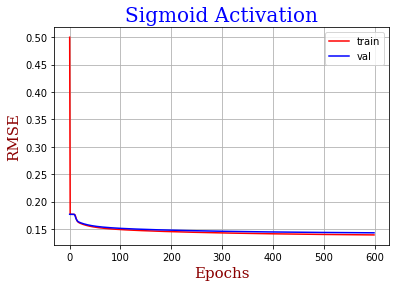

In [ ]:
logi.plot_learning_curves(logi.train_errors,logi.val_errors)

✅ **Train and Validation Learning Curves Showing a Good Fit**

* **Precision and Recall**


In [ ]:
from sklearn.metrics import precision_score, recall_score

predition = logi.predict(X_train)
precision= precision_score(y_train, predition,average='micro')
recall= recall_score(y_train, predition,average='micro') 

print("Precision accuracy: ", precision, "\n")
print("Recall accuracy: ", recall)

Precision accuracy:  0.765 

Recall accuracy:  0.765


* **Confusion Matrix Display**

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60abe59050>)

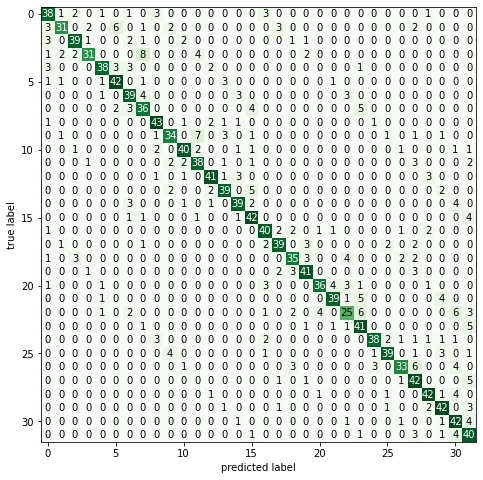

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(y_true=y_train, y_pred=predition)

plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Greens)

In [ ]:
predition_testset = logi.predict(X_test)
score = logi.score(X_test,y_test)

print("the accuracy of the model is ",score)

the accuracy of the model is  [0.765625]


After running the code cell above, you should see that you get **76% accuracy on the test** set.

# Class Neural network (With sofmax)

[Derivative of Cross Entropy Loss with Softmax](https://deepnotes.io/softmax-crossentropy)

In [ ]:
class NeuralNetwork_MultiClass(object):

  def __init__(self, alpha=0.5 ,n_iteration=100): 

    self.alpha = alpha                         
    self.n_iter = n_iteration
    self.weights= 0.002 * np.random.randn(6,32)
        
  def softmax(self,A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

  def fit(self, X, y): #This function primarily calculates the optimal theta value using which we predict the future data

    print("Fitting the given dataset..")
   
    self.train_errors, self.val_errors = [], []
    
    X = np.insert(X, 0, 1, axis=1)
  
    encoder = OneHotEncoder(sparse=False)
    onehot = encoder.fit_transform(y)
    X, y = shuffle(X, onehot)
    
    for _ in range(self.n_iter):

      m = y.shape[0]

      # =========== Phase 1: Forward propagation
      
      z= X.dot(self.weights)
      yhat= self.softmax(z)

      error= yhat - y

      # ============== calculate cross entropy for each example
      
      loss = (-1/m) * np.sum(y * np.log(yhat))

      self.train_errors.append(loss)

      # =========== Phase 2: Backpropagation

      dE_dw= (1/m) * np.dot(X.T,error)
        
      self.weights -= self.alpha * dE_dw

    return self

  def predict(self, X): 

    X = np.insert(X, 0, 1, axis=1)
    z= X.dot(self.weights)
    yhat= self.softmax(z)
    X_predicted= np.argmax(yhat, axis=1)
    X_predicted +=1
    X_predicted= X_predicted.reshape(-1,1)

    return X_predicted

  def score(self,X, y): #This function compares the predictd label with the actual label to find the model performance
    score = sum(self.predict(X) == y) / len(y)
    return score    

  def plot_learning_curves(self, p1,p2):

    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}

    plt.plot(np.sqrt(p1), "r", label="train")
    plt.title('Softmax Activation',fontdict = font1)
    plt.xlabel('Epochs', fontdict = font2)
    plt.ylabel('RMSE', fontdict = font2)
    plt.grid(True)
    plt.legend()
    plt.show()  

In [ ]:
logi2 = NeuralNetwork_MultiClass(n_iteration=2000).fit(X_train, y_train)

Fitting the given dataset..


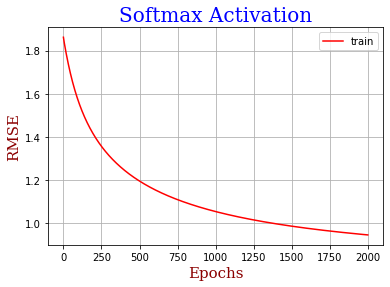

In [ ]:
logi2.plot_learning_curves(logi2.train_errors,logi2.val_errors)

In [ ]:
score = logi2.score(X_train,y_train)

print("the accuracy of the model is ",score)

the accuracy of the model is  [0.75625]


In [ ]:
score = logi2.score(X_test,y_test)

print("the accuracy of the model is ",score)

the accuracy of the model is  [0.733125]


After running the code cell above, you should see that you get **75% training accuracy** and **73% accuracy on the test set**. Not bad for a simple neural network!

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc99d04d850>)

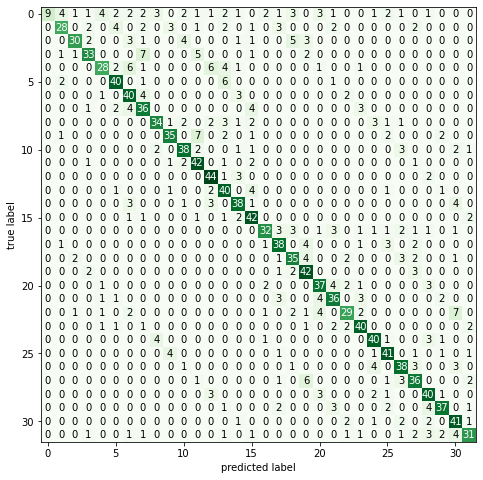

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predition)

plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Greens)